In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, plot_precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score, auc)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv('df_combined.csv')

In [3]:
df.head()

,id,race,gender,age,Stage_Progress,blood_pressure,cholesterol,diabetes,min_cr,max_cr,mean_cr,std_cr,last_cr,min_dbp,max_dbp,mean_dbp,std_dbp,last_dbp,min_glu,max_glu,mean_glu,std_glu,last_glu,min_hgb,max_hgb,mean_hgb,std_hgb,last_hgb,min_ldl,max_ldl,mean_ldl,std_ldl,last_ldl,min_sbp,max_sbp,mean_sbp,std_sbp,last_sbp,egfr
0,0,Unknown,Male,70,True,1.0,1.0,1.0,1.08,1.44,1.236667,0.123558,1.23,65.97,95.32,83.173750,8.439941,84.29,5.62,7.20,6.456667,0.671019,5.78,12.63,13.65,13.262222,0.336926,13.13,111.39,161.49,143.593333,27.946610,157.90,125.08,154.91,139.610000,11.202252,147.50,58.174498
1,1,White,Female,71,False,0.0,1.0,0.0,1.61,2.20,1.838000,0.219932,2.20,72.49,90.99,80.455714,6.509255,90.99,8.27,9.96,9.240000,0.818138,9.78,12.85,14.81,13.662857,0.740084,12.85,71.56,98.73,82.424000,11.520748,73.24,137.75,157.46,150.232857,6.919431,149.66,22.002941
2,2,White,Female,57,True,0.0,1.0,0.0,1.89,2.51,2.170000,0.239896,2.20,81.13,92.36,89.217500,5.402693,91.52,5.12,7.24,6.466667,1.170527,7.04,14.31,16.84,15.700000,0.820662,15.19,61.62,87.14,75.283333,12.855568,87.14,132.89,147.76,140.210000,6.758644,136.46,23.006131
3,3,White,Male,74,False,0.0,1.0,0.0,0.74,1.35,0.996000,0.235648,0.90,66.44,81.74,74.857143,6.390231,67.45,5.41,7.45,6.525000,0.838469,5.77,12.34,14.43,13.198000,0.818655,12.66,80.80,110.29,98.246000,10.749676,101.42,121.21,148.89,139.588571,11.282921,142.88,82.487502
4,4,White,Female,50,True,1.0,1.0,1.0,0.93,1.35,1.150000,0.166253,0.93,82.23,111.44,97.385714,10.760423,104.57,8.58,11.00,9.720000,0.924193,11.00,11.63,13.21,12.658000,0.613612,11.63,54.61,72.03,65.907500,8.037397,72.03,128.78,173.75,160.667143,15.205728,166.45,63.814845


In [4]:
# convert categorical variables into binary vectors.
df = pd.get_dummies(data=df, columns= ['race'])

In [5]:
# Convert Female to 0 and Male to 1
df['gender'] = df['gender'].replace({'Female':0, 'Male':1})

# Convert True to 1 and False to 0
df['Stage_Progress'] = df['Stage_Progress'].astype(int)

In [6]:
df.head()

,id,gender,age,Stage_Progress,blood_pressure,cholesterol,diabetes,min_cr,max_cr,mean_cr,std_cr,last_cr,min_dbp,max_dbp,mean_dbp,std_dbp,last_dbp,min_glu,max_glu,mean_glu,std_glu,last_glu,min_hgb,max_hgb,mean_hgb,std_hgb,last_hgb,min_ldl,max_ldl,mean_ldl,std_ldl,last_ldl,min_sbp,max_sbp,mean_sbp,std_sbp,last_sbp,egfr,race_Asian,race_Black,race_Hispanic,race_Unknown,race_White
0,0,1,70,1,1.0,1.0,1.0,1.08,1.44,1.236667,0.123558,1.23,65.97,95.32,83.173750,8.439941,84.29,5.62,7.20,6.456667,0.671019,5.78,12.63,13.65,13.262222,0.336926,13.13,111.39,161.49,143.593333,27.946610,157.90,125.08,154.91,139.610000,11.202252,147.50,58.174498,0,0,0,1,0
1,1,0,71,0,0.0,1.0,0.0,1.61,2.20,1.838000,0.219932,2.20,72.49,90.99,80.455714,6.509255,90.99,8.27,9.96,9.240000,0.818138,9.78,12.85,14.81,13.662857,0.740084,12.85,71.56,98.73,82.424000,11.520748,73.24,137.75,157.46,150.232857,6.919431,149.66,22.002941,0,0,0,0,1
2,2,0,57,1,0.0,1.0,0.0,1.89,2.51,2.170000,0.239896,2.20,81.13,92.36,89.217500,5.402693,91.52,5.12,7.24,6.466667,1.170527,7.04,14.31,16.84,15.700000,0.820662,15.19,61.62,87.14,75.283333,12.855568,87.14,132.89,147.76,140.210000,6.758644,136.46,23.006131,0,0,0,0,1
3,3,1,74,0,0.0,1.0,0.0,0.74,1.35,0.996000,0.235648,0.90,66.44,81.74,74.857143,6.390231,67.45,5.41,7.45,6.525000,0.838469,5.77,12.34,14.43,13.198000,0.818655,12.66,80.80,110.29,98.246000,10.749676,101.42,121.21,148.89,139.588571,11.282921,142.88,82.487502,0,0,0,0,1
4,4,0,50,1,1.0,1.0,1.0,0.93,1.35,1.150000,0.166253,0.93,82.23,111.44,97.385714,10.760423,104.57,8.58,11.00,9.720000,0.924193,11.00,11.63,13.21,12.658000,0.613612,11.63,54.61,72.03,65.907500,8.037397,72.03,128.78,173.75,160.667143,15.205728,166.45,63.814845,0,0,0,0,1


In this section, we tested out a variety of predictive models. We carried out the following process:
- Train-test-split data
- Calculate baseline and benchmark models
- Fit model to the training data
- Carried out hyper-parameter tuning on our most promising models 
- Identified our top-performing model based on the ROC-AUC score

In [7]:
df.to_csv('df_variables.csv', index=False)

## Train Test Split

In [8]:
X = df.drop(columns=['id','Stage_Progress'])
y = df['Stage_Progress']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=9)

## Baseline Model

For this problem, I believe that using the Area Under Curve (AUC) as a metric will be an appropriate idea because it focuses on our sensitivity and specificity of our model. To elaborate, AUC measures how true positive rate (recall) and false positive rate trade-off. This reveals how good a model is at distinguishing between positive class and negative class. By analogy, the Higher the AUC, the better the model is at distinguishing whether the patients will progress with CKD or not in the future.
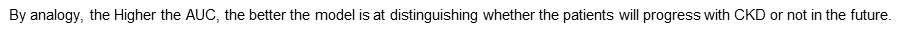
Using an AUC Reciever Operating Characteristic or AUC-ROC curve, __we can visually compare the true positive and false positive rates at a range of different classification thresholds to identify our best model__.

In [10]:
# Baseline
y.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Stage_Progress, dtype: float64

We can see that our base model have 67% or the False Stage Progress and 33% of the True Stage Progress.

In [11]:
# Instiantiate models
models = {'lr': LogisticRegression(random_state=19),
          'rf': RandomForestClassifier(random_state=19),
          'et': ExtraTreesClassifier(random_state=19),
          'svc': SVC(random_state=19),
          'ada': AdaBoostClassifier(random_state=19),
          'gb': GradientBoostingClassifier(random_state=19),
          'xgb': XGBClassifier(random_state=19)
        }

In [12]:
# Instantiate lists to store results
init_list = []
gs_list = []

# Function to run model -- input scaler and model
def run_model(mod, mod_params={}, grid_search=False):
    
    # Initial dictionary to hold model results
    results = {}
    
    pipe = Pipeline([
            ('ss', StandardScaler()),
            (mod, models[mod])
            ])
    
    if grid_search:
        # Instantiate list to store gridsearch results
        gs = GridSearchCV(pipe, param_grid=mod_params, cv=5, verbose=1, scoring='roc_auc', n_jobs=-1)
        gs.fit(X_train, y_train)
        pipe = gs.best_estimator_
        
    else:
        pipe.fit(X_train, y_train)
    
    # Retrieve metrics
    predictions = pipe.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    y_test_pred_prob = pipe.predict_proba(X_test)[:,1]
    y_train_pred_prob = pipe.predict_proba(X_train)[:,1]
    
    results['model'] = mod
    results['train_auc'] = roc_auc_score(y_train, y_train_pred_prob)
    results['test_auc'] = roc_auc_score(y_test, y_test_pred_prob)
    results['precision'] = precision_score(y_test, predictions)
    results['specificity'] = tn / (tn + fp)
    results['recall'] = recall_score(y_test, predictions)
    results['f_score'] = f1_score(y_test, predictions)
    
    if grid_search:
        gs_list.append(results)
        print('### BEST PARAMS ###')
        display(pipe)
        
    else:
        init_list.append(results)
    
    print('### METRICS ###')
    display(results)
    
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return pipe

### Logistic Regression

It is a classification algorithm that is generally used for binary classification. It uses a logistic function to find the probability of occurrence of the selected class.

In [13]:
Pipeline([('lr', LogisticRegression())]).get_params()

{'memory': None,
 'steps': [('lr', LogisticRegression())],
 'verbose': False,
 'lr': LogisticRegression(),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

In [14]:
lr_params = {
    'lr__class_weight': ['balance'],
    'lr__solver': ['saga'],
    'lr__penalty': ['elasticnet'],
    'lr__l1_ratio': [0.25, 0.5, 0.75],
    'lr__C': [0.1, 0.5, 0.75],
    'lr__max_iter': [500, 700]
            }

In [15]:
lr_gs = run_model('lr', mod_params=lr_params, grid_search=True)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.75, class_weight='balance',
                                    l1_ratio=0.25, max_iter=500,
                                    penalty='elasticnet', random_state=19,
                                    solver='saga'))])

### METRICS ###


{'model': 'lr',
 'train_auc': 0.8823111111111112,
 'test_auc': 0.8432,
 'precision': 0.8,
 'specificity': 0.92,
 'recall': 0.64,
 'f_score': 0.7111111111111111}

True Negatives: 46
False Positives: 4
False Negatives: 9
True Positives: 16


### Random Forest 

Random Forest is an improvement of decision trees, where multiple decision trees are merged into one forest. At each split in the tree, the algorithm is not allowed to consider all the available predictors/attributes. This is implemented to avoid using the same major predictor in all of the trees, i.e., to force the trees to use lesser important predictors.

In [16]:
Pipeline([('rf', RandomForestClassifier())]).get_params()

{'memory': None,
 'steps': [('rf', RandomForestClassifier())],
 'verbose': False,
 'rf': RandomForestClassifier(),
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [17]:
rf_params = {
    'rf__n_estimators': [70],
    'rf__max_depth': [10, 15],
    'rf__min_samples_leaf': [5, 10],
    'rf__max_leaf_nodes': [5, 10, 15],
    'rf__class_weight': ["balanced", "balanced_subsample"]
            }

In [18]:
rf_gs = run_model('rf', mod_params=rf_params, grid_search=True)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_leaf_nodes=10, min_samples_leaf=5,
                                        n_estimators=70, random_state=19))])

### METRICS ###


{'model': 'rf',
 'train_auc': 0.9882666666666667,
 'test_auc': 0.7912,
 'precision': 0.7894736842105263,
 'specificity': 0.92,
 'recall': 0.6,
 'f_score': 0.6818181818181819}

True Negatives: 46
False Positives: 4
False Negatives: 10
True Positives: 15


### Extra Tree

The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction from decision trees.

In [19]:
Pipeline([('et', ExtraTreesClassifier())]).get_params()

{'memory': None,
 'steps': [('et', ExtraTreesClassifier())],
 'verbose': False,
 'et': ExtraTreesClassifier(),
 'et__bootstrap': False,
 'et__ccp_alpha': 0.0,
 'et__class_weight': None,
 'et__criterion': 'gini',
 'et__max_depth': None,
 'et__max_features': 'auto',
 'et__max_leaf_nodes': None,
 'et__max_samples': None,
 'et__min_impurity_decrease': 0.0,
 'et__min_impurity_split': None,
 'et__min_samples_leaf': 1,
 'et__min_samples_split': 2,
 'et__min_weight_fraction_leaf': 0.0,
 'et__n_estimators': 100,
 'et__n_jobs': None,
 'et__oob_score': False,
 'et__random_state': None,
 'et__verbose': 0,
 'et__warm_start': False}

In [20]:
et_params = {
    'et__n_estimators': [30, 50, 70],
    'et__max_depth': [8, 10, 12],
    'et__min_samples_leaf': [1, 2, 3],
    'et__max_leaf_nodes': [5, 10, 15],
    'et__class_weight': ["balanced", "balanced_subsample"],
    'et__max_features': ["log2"]
            }

In [21]:
et_gs =  run_model('et', mod_params=et_params, grid_search=True)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('et',
                 ExtraTreesClassifier(class_weight='balanced', max_depth=10,
                                      max_features='log2', max_leaf_nodes=15,
                                      min_samples_leaf=2, n_estimators=50,
                                      random_state=19))])

### METRICS ###


{'model': 'et',
 'train_auc': 0.9846222222222222,
 'test_auc': 0.8208,
 'precision': 0.6428571428571429,
 'specificity': 0.8,
 'recall': 0.72,
 'f_score': 0.6792452830188679}

True Negatives: 40
False Positives: 10
False Negatives: 7
True Positives: 18


### SVC

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [22]:
Pipeline([('svc', SVC())]).get_params()

{'memory': None,
 'steps': [('svc', SVC())],
 'verbose': False,
 'svc': SVC(),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [23]:
svc_params = {
    'svc__gamma':[0.001, 0.01], 
    'svc__kernel':['linear', 'poly', 'rbf'],
    'svc__degree': [2, 3],
    'svc__class_weight': ['balanced'],
    'svc__probability': [True]
}

In [24]:
svc_gs =  run_model('svc', mod_params=svc_params, grid_search=True)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', degree=2, gamma=0.001,
                     kernel='linear', probability=True, random_state=19))])

### METRICS ###


{'model': 'svc',
 'train_auc': 0.8984,
 'test_auc': 0.7807999999999998,
 'precision': 0.6071428571428571,
 'specificity': 0.78,
 'recall': 0.68,
 'f_score': 0.6415094339622641}

True Negatives: 39
False Positives: 11
False Negatives: 8
True Positives: 17


### Adaptive Boosting

Adaptive boosting method is suitable for the weak base learners. It is an aggregation of many weak classifiers. The model adapts itself in every iteration sequentially based on the results of the previous iterations.

In [25]:
Pipeline([('ada', AdaBoostClassifier())]).get_params()

{'memory': None,
 'steps': [('ada', AdaBoostClassifier())],
 'verbose': False,
 'ada': AdaBoostClassifier(),
 'ada__algorithm': 'SAMME.R',
 'ada__base_estimator': None,
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 50,
 'ada__random_state': None}

In [26]:
ada_params = {
    'ada__base_estimator':[LogisticRegression() ,SVC()],
    'ada__n_estimators': [150, 200],
    'ada__algorithm': ['SAMME']
             }

In [27]:
ada_gs = run_model('ada', mod_params=ada_params, grid_search=True)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=LogisticRegression(),
                                    n_estimators=150, random_state=19))])

### METRICS ###


{'model': 'ada',
 'train_auc': 0.8456888888888888,
 'test_auc': 0.8128000000000001,
 'precision': 0.75,
 'specificity': 0.9,
 'recall': 0.6,
 'f_score': 0.6666666666666665}

True Negatives: 45
False Positives: 5
False Negatives: 10
True Positives: 15


### Gradient Boosting

Gradient boosting is a generalization of Adaptive Boosting, improving the performance of the approach and introducing ideas from bootstrap aggregation to further improve the models, such as randomly sampling the samples and features when fitting ensemble members.

In [28]:
Pipeline([('gb', GradientBoostingClassifier())]).get_params()

{'memory': None,
 'steps': [('gb', GradientBoostingClassifier())],
 'verbose': False,
 'gb': GradientBoostingClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'deviance',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_impurity_split': None,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False}

In [29]:
gb_params = {
    'gb__n_estimators': [200, 300],
    'gb__max_depth': [2, 4, 6],
    'gb__max_features': ["auto"],
    'gb__min_samples_leaf': [10, 12],
    'gb__max_leaf_nodes': [5, 10]
}

In [30]:
gb_gs = run_model('gb', mod_params=gb_params, grid_search=True)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(max_depth=2, max_features='auto',
                                            max_leaf_nodes=5,
                                            min_samples_leaf=10,
                                            n_estimators=300,
                                            random_state=19))])

### METRICS ###


{'model': 'gb',
 'train_auc': 1.0,
 'test_auc': 0.772,
 'precision': 0.7368421052631579,
 'specificity': 0.9,
 'recall': 0.56,
 'f_score': 0.6363636363636364}

True Negatives: 45
False Positives: 5
False Negatives: 11
True Positives: 14


### XG Boost

Extreme gradient boosting is an ensemble learning similar to Random Forest, which builds the models sequentially, applies gradient descent to decrease the error rate, and reduces overfitting with tree pruning and regularization.

In [31]:
Pipeline([('xgb', XGBClassifier())]).get_params()

{'memory': None,
 'steps': [('xgb',
   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None, gamma=None,
                 gpu_id=None, importance_type='gain', interaction_constraints=None,
                 learning_rate=None, max_delta_step=None, max_depth=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 random_state=None, reg_alpha=None, reg_lambda=None,
                 scale_pos_weight=None, subsample=None, tree_method=None,
                 validate_parameters=None, verbosity=None))],
 'verbose': False,
 'xgb': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=N

In [32]:
xgb_params = {
     'xgb__use_label_encoder': [False],
     'xgb__booster': ['gbtree', 'gblinear'],
     'xgb__colsample_bytree': [0.5, 0.7, 1],
     'xgb__gamma': [0.001, 0.01, 0.1],
     'xgb__learning_rate': [0.001, 0.01, 0.1],
     'xgb__max_depth': [10, 15, 20],
     'xgb__n_estimators': [70, 90, 110]
}

In [33]:
xgb_gs = run_model('xgb', mod_params=xgb_params, grid_search=True)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[07:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
### BEST PARAMS ###


Pipeline(steps=[('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, gamma=0.001, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=0.1,
                               max_delta_step=None, max_depth=10,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=110,
                               n_jobs=12, num_parallel_tree=None,
                               random_state=19, reg_alpha=0, reg_lambda=0,
                               scale_pos_weight=1, subsample=None,
                               tree_method=None, use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

### METRICS ###


{'model': 'xgb',
 'train_auc': 0.8730666666666668,
 'test_auc': 0.8384,
 'precision': 0.8095238095238095,
 'specificity': 0.92,
 'recall': 0.68,
 'f_score': 0.7391304347826089}

True Negatives: 46
False Positives: 4
False Negatives: 8
True Positives: 17


In [34]:
gs_df = pd.DataFrame(gs_list)
gs_df.sort_values(by='test_auc', ascending=False)

,model,train_auc,test_auc,precision,specificity,recall,f_score
0,lr,0.882311,0.8432,0.800000,0.92,0.64,0.711111
6,xgb,0.873067,0.8384,0.809524,0.92,0.68,0.739130
2,et,0.984622,0.8208,0.642857,0.80,0.72,0.679245
4,ada,0.845689,0.8128,0.750000,0.90,0.60,0.666667
1,rf,0.988267,0.7912,0.789474,0.92,0.60,0.681818
3,svc,0.898400,0.7808,0.607143,0.78,0.68,0.641509
5,gb,1.000000,0.7720,0.736842,0.90,0.56,0.636364


At this point, it's a bit hard to conclude which is the best classification model. Our Logistic Regression classifier has the best test AUC scores, and XGBoosting Classifier has better precision and recall scores which is good at identifying true positives.

## AUC-ROC Evaluation

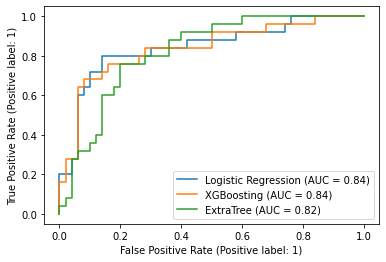

In [35]:
disp = plot_roc_curve(lr_gs, X_test, y_test, name='Logistic Regression')
plot_roc_curve(xgb_gs, X_test, y_test, ax=disp.ax_, name='XGBoosting')
plot_roc_curve(et_gs, X_test, y_test, ax=disp.ax_, name='ExtraTree');

Logistic Regression and eXtreme Gradient Boosting classifier seem to have a slower drop off in true positive versus false positive rate. However, Extra Tree classifier tends to have a faster drop off in true positive versus false positive rate.

## Precision-Recall Curve

Beyond focusing just on AUC which looks at how good our modelling is at separating our positive and negative class, we also want to pay close attention to our model's ability to classify most or all of our minority class (which in this case is our positive class). 

Using a Precision-Recall curve, we can look at the tradeoff between a classifier’s precision, a measure of result relevancy, and recall, a measure of completeness. Precision is defined as the ratio of true positives to the sum of true and false positives, and recall is the ratio of true positives to the sum of true positives and false negatives.

For diagnostic tests, I think we should first like to know the sensitivity (= recall) because we want to be sure that the test identifies the vast majority of persons with a CKD as having the CKD 

Then we would like to know the positive predictive value (= precision) because precision tells us how sure we can be, when we have a positive result, that the person actually has the CKD. Thus, we know how good the test is at discriminating persons with CKD from those without CKD.

In this case, Logistic Regression and eXtreme Gradient Boosting classifier seems to have similar performance, but it looks like the eXtreme Gradient Boosting classifier slightly edges out. Thus, eXtreme Gradient Boosting classifier is a better model for this problem.

[eXtreme Gradient Boosting classifier](https://analyticsindiamag.com/xgboost-internal-working-to-make-decision-trees-and-deduce-predictions/) falls under the category of Boosting techniques in Ensemble Learning. Ensemble learning consists of a collection of predictors which are multiple models to provide better prediction accuracy. In Boosting technique the errors made by previous models are tried to be corrected by succeeding models by adding some weights to the models. 

eXtreme Gradient Boosting classifier implements normally performs learning based on boosting trees, it also implements a second algorithm based on linear boosting. In this case, linear boosting is gets slightly better performance metrics than boosting trees because there is nothing better than a linear algorithm to catch a linear link.

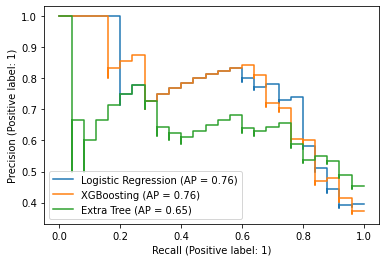

In [36]:
disp = plot_precision_recall_curve(lr_gs, X_test, y_test, name='Logistic Regression')
plot_precision_recall_curve(xgb_gs, X_test, y_test, ax=disp.ax_, name='XGBoosting')
plot_precision_recall_curve(et_gs, X_test, y_test, ax=disp.ax_, name='Extra Tree');

## Final Model - XGB

### Feature Important List

In [37]:
feat_imp = pd.DataFrame(data=xgb_gs.steps[1][1].coef_, index=X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
feat_imp.head(10)

,Coefficient
last_ldl,1.896340
last_glu,1.070630
last_sbp,0.720908
egfr,0.709594
max_cr,0.391435
max_dbp,0.343430
max_hgb,0.252823
max_sbp,0.184657
min_cr,0.148399
blood_pressure,0.131954


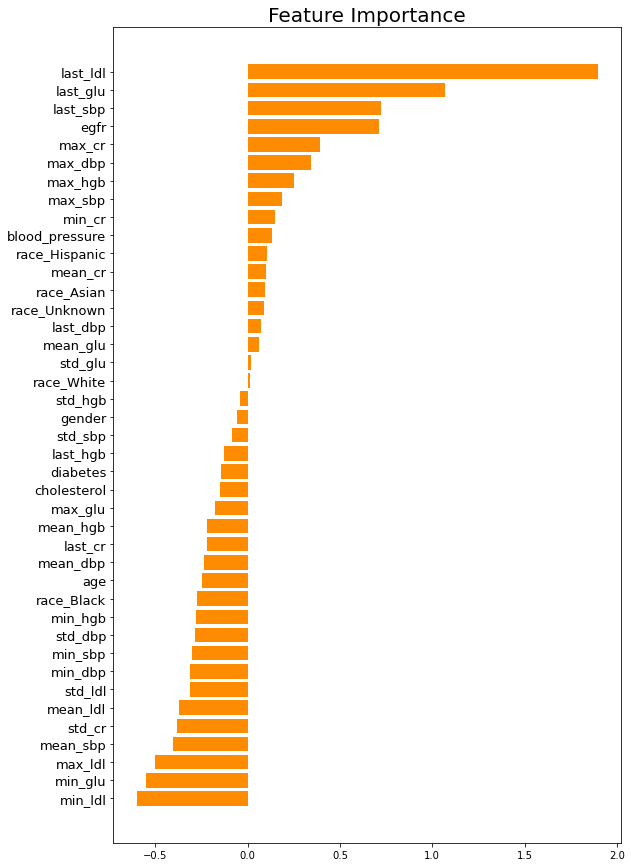

In [38]:
feature_importance = xgb_gs.steps[1][1].coef_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center', color='darkorange')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx], fontsize = 13)
plt.title('Feature Importance', fontsize = 20);

## Refit XGB to Complete Dataset

In [39]:
# instantiate pipeline
pipe_xgb = Pipeline([('ss', StandardScaler()),
                     ('xgb', XGBClassifier(random_state=19))])

# Define dictionary of hyperparameters
pipe_params_xgb = {
     'xgb__use_label_encoder': [False],
     'xgb__booster': ['gbtree', 'gblinear'],
     'xgb__colsample_bytree': [0.5, 0.7, 1],
     'xgb__gamma': [0.001, 0.01, 0.1],
     'xgb__learning_rate': [0.001, 0.01, 0.1],
     'xgb__max_depth': [10, 15, 20],
     'xgb__n_estimators': [500, 700]
}

# Instantiate GridSearchCV.
gs_xgb = GridSearchCV(pipe_xgb, param_grid=pipe_params_xgb, cv=5, verbose=1, scoring='roc_auc', n_jobs=-1)

# fit to X, y
gs_xgb.fit(X, y)

# find the best estimator
gs_xgb_model = gs_xgb.best_estimator_
gs_xgb_model

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[07:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, gamma=0.001, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=0.1,
                               max_delta_step=None, max_depth=15,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_jobs=12, num_parallel_tree=None,
                               random_state=19, reg_alpha=0, reg_lambda=0,
                               scale_pos_weight=1, subsample=None,
                               tree_method=None, use_label_encoder=False,
                               validate_parameters=1, verbosity=None))])

In [40]:
predictions = gs_xgb_model.predict(X)
tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
y_pred_prob = gs_xgb.predict_proba(X)[:,1]

print(f'CKD data AUC: {round(roc_auc_score(y, y_pred_prob), 4)}')
print(f'CKD data precision: {round(precision_score(y, predictions), 4)}')
print(f'CKD data specificity: {round((tn / (tn + fp)), 4)}')
print(f'CKD data recall: {round(recall_score(y, predictions), 4)}')
print(f'CKD data F1 score: {round(f1_score(y, predictions), 2)}')

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

CKD data AUC: 0.8934
CKD data precision: 0.7614
CKD data specificity: 0.895
CKD data recall: 0.67
CKD data F1 score: 0.71
True Negatives: 179
False Positives: 21
False Negatives: 33
True Positives: 67


In [41]:
# gs_xgb_model prediction results, False = 0, True = 1
df_1 = pd.DataFrame(predictions)
df_1[0].value_counts()

0    212
1     88
Name: 0, dtype: int64

### AUC-ROC Curve

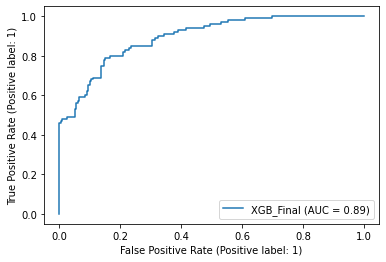

In [42]:
disp = plot_roc_curve(gs_xgb_model, X, y, name='XGB_Final')

### Precision-Recall Curve

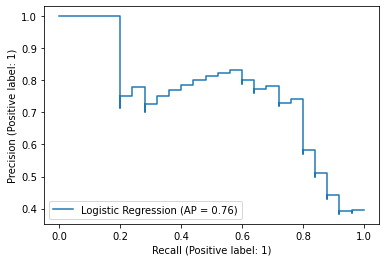

In [43]:
disp = plot_precision_recall_curve(lr_gs, X_test, y_test, name='Logistic Regression')

### Feature Importance List

In [44]:
final_feat_imp = pd.DataFrame(data=gs_xgb_model.steps[1][1].coef_, index=X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
final_feat_imp.head(10)

,Coefficient
last_ldl,3.272610
last_glu,1.709820
max_hgb,1.599490
egfr,1.329510
last_sbp,1.136800
last_cr,0.598965
max_dbp,0.580001
max_cr,0.528008
max_sbp,0.373614
last_dbp,0.294402


The __top features__ that impact the prediction based on the eXtreme Gradient Boosting classifier are:

1. Latest reading of the patients (LDL, Glucose, SBP, Creatinine, DBP)
2. eGFR (base on latest Creatinine reading, age, gender and race)
3. Maximum reading of the patients (HGB, DBP, Creatinine and SBP)

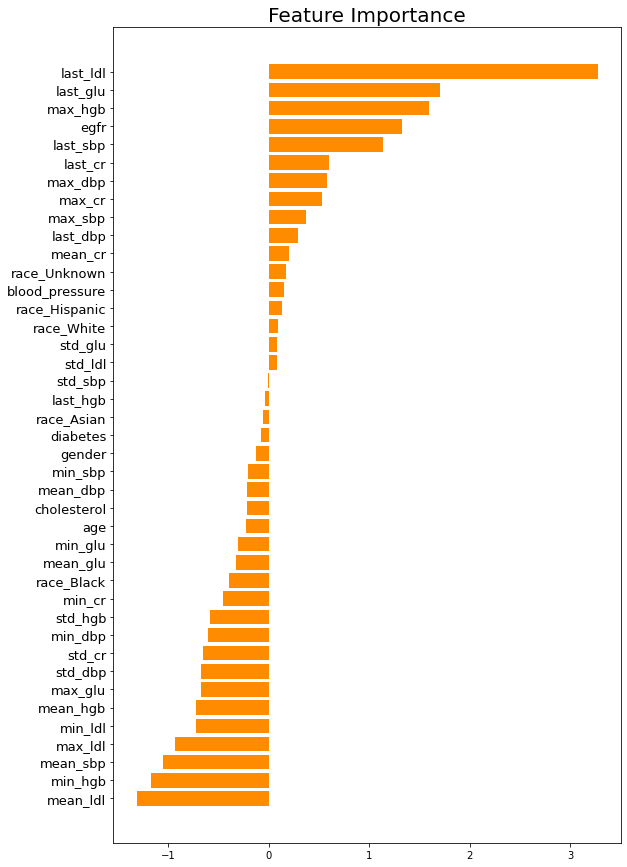

In [45]:
feature_importance = gs_xgb_model.steps[1][1].coef_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center', color='darkorange')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx], fontsize = 13)
plt.title('Feature Importance', fontsize = 20);

In [46]:
# Saving final model for future analysis
pkl_final_model = 'data/final_model.pkl'
pickle.dump(gs_xgb_model, open(pkl_final_model, 'wb'))